In [1]:
import numpy as np
from numpy import linalg as LA
from scipy.interpolate import interp1d

In [2]:
import matplotlib.pyplot  as plt
import plotly.graph_objects as go
from time import time

In [3]:
def Init_stringA(A,B,N=20):
    
    temp=np.array([A,B])
    d1=temp[:,0]
    d2=temp[:,1]
    alpha=np.array([0,1])
    d1_re=Init_interpolation(alpha,d1,N).reshape(-1,1)
    d2_re=Init_interpolation(alpha,d2,N).reshape(-1,1)

    return np.concatenate([d1_re,d2_re],axis=1)
def Init_interpolation(x,y,N=20):
    f=interp1d(x, y, kind='linear')
    return f(np.array(range(N+1))/N)

In [4]:
B=np.array([-2.87,0.86])
A=np.array([-0,.00])
# B=np.array([1,.00])

In [5]:
Init=Init_stringA(A,B,40)

In [6]:
AA=np.append(Init[:10,:],Init[-10:,:]).reshape(20,2)

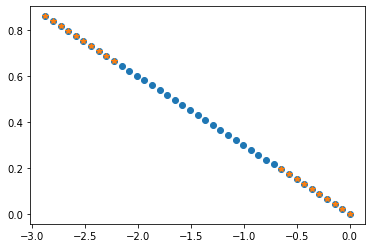

In [7]:
plt.plot(Init[:,0],Init[:,1],'o')
plt.plot(AA[:,0],AA[:,1],'*')


In [48]:
def V(x):
    #V(x,y)=(x^2-1)^2+y^2
    Y=x[-1]
    X=x[0]
    return 1+np.sin(X)*np.sin(X)+np.sin(Y)*np.sin(Y)-np.exp(-(X*X+Y*Y))
#     return (X*X-1)*(X*X-1)+Y*Y

def gradient_V(x):
    '''gradient of V'''
    y=x[-1]
    x=x[0]
#     d1=4*X*X*X-4*X
#     d2=2*Y
    d1=2*np.sin(x)*np.cos(x)+2*x*np.exp(-(x*x+y*y))
    d2=2*np.sin(y)*np.cos(y)+2*y*np.exp(-(x*x+y*y))
    return np.array([d1,d2])

In [49]:
xinit=Init[:,0]
yinit=Init[:,1]
zinit=list(map(V,Init))

In [141]:
def V(x):
    #V(x,y)=(1-x^2-y^2)^2+y^2/(x^2+y^2)
    Y=x[-1]
    X=x[0]
    return (1-X*X-Y*Y)*(1-X*X-Y*Y)+Y*Y/(X*X+Y*Y)
def gradient_V(x):
    '''gradient of V'''
    Y=x[-1]
    X=x[0]
    d1=-4*X*(1-X*X-Y*Y)-Y*Y*2*X/((X*X+Y*Y)*(X*X+Y*Y))
    d2=-4*Y*(1-X*X-Y*Y)+Y*2*X*X/((X*X+Y*Y)*(X*X+Y*Y))
    return np.array([d1,d2])

In [26]:
def V(x):
    #V(x,y)=(x^2-1)^2+y^2
    Y=x[-1]
    X=x[0]
    return 1+np.sin(X)*np.sin(X)+np.sin(Y)*np.sin(Y)-np.exp(-(X*X+Y*Y))
#     return (X*X-1)*(X*X-1)+Y*Y

def gradient_V(x):
    '''gradient of V'''
    y=x[-1]
    x=x[0]
#     d1=4*X*X*X-4*X
#     d2=2*Y
    d1=2*np.sin(x)*np.cos(x)+2*x*np.exp(-(x*x+y*y))
    d2=2*np.sin(y)*np.cos(y)+2*y*np.exp(-(x*x+y*y))
    return np.array([d1,d2])

In [50]:
[X,Y]=np.meshgrid(np.linspace(-4,4,200),np.linspace(-4,4,200))
Z=1+np.sin(X)*np.sin(X)+np.sin(Y)*np.sin(Y)-np.exp(-(X*X+Y*Y));




In [143]:
[X,Y]=np.meshgrid(np.linspace(-4,4,200),np.linspace(-4,4,200))
Z=1+np.sin(0.8*X)*np.sin(0.8*X)+np.sin(Y)*np.sin(Y)-np.exp(-(X*X+Y*Y));

# [X,Y]=np.meshgrid(np.linspace(-1.3,1.3,200),np.linspace(-1.3,1.3,200))
# Z=(X*X-1)*(X*X-1)+Y*Y
[X,Y]=np.meshgrid(np.linspace(-1.3,1.3,200),np.linspace(-0.3,1.3,200))
Z=(1-X*X-Y*Y)*(1-X*X-Y*Y)+Y*Y/(X*X+Y*Y)
%matplotlib inline
    
# fig = go.Figure(data=[go.Surface(z=Z, x=X, y=Y)]) # z is 2D,x,y could be 1d 2d
# fig.update_layout(title='V', autosize=False,
#                       width=500, height=500,
#                       margin=dict(l=65, r=50, b=65, t=90))

# fig.add_scatter3d(
#         x=xinit,
#         y=yinit,
#         z=zinit,
#         name='Initial',
#         mode='markers',
#         marker=dict(
#             size=2,                # set color to an array/list of desired values
#             colorscale='Blackbody',   # choose a colorscale
#             opacity=0.8
#         ))
# fig.show()

In [107]:
def rungeKutta(phi,dt,f):
    '''
    solve autonomous ODE phi_t=f(phi),eq(6) in the paper with forth order
    phi: ith image of string, to update from nth iteration to (n+1)th iteration
    dt: time step
    f: a function
    '''
    k1=dt*f(phi)
    k2=dt*f(phi+1/2*k1)
    k3=dt*f(phi+1/2*k2)
    k4=dt*f(phi+k3)
    rg=-(k1/6+k2/3+k3/3+k4/6)#f=gradient V, there should minus
    return rg

def euler(phi,dt,gradient):
    '''
    explicit euler, gradient is \Delta V(phi)
    '''
    return -dt*gradient

In [29]:
V(Init[0])


0.0

In [134]:
def Repara(Phi,N=20):
    '''Phi is the string discretized by N images, each image is M-dimension'''
    length=len(Phi)
    #alpha^star
    s=[]
    s.append(0)#s_0=0
    for i in range(length-1):
#         s.append(s[i]+LA.norm(Phi[i+1,:]-Phi[i,:]))
        s.append(s[i]+np.exp(0.5*V(Phi[i+1,:])+0.5*V(Phi[i,:]))*LA.norm(Phi[i+1,:]-Phi[i,:]))
    alpha=np.array(s)/s[-1]
    #cubic spline interpolation for every dimension eg: (alpha,phi_1) and (alpha,phi_2)(if phi is two dimensional
    d_list=[]
    for i in range(Phi.shape[-1]):
        d=Phi[:,i]
        d_list.append(spline_repara(alpha,d,N).reshape(-1,1))#cubic spline interpolatation on every dimension

    return np.concatenate(d_list,axis=1)


In [135]:
def spline_repara(x,y,N=20):
    '''spline interpolation 1d
    divede into N images'''
    
    # from scipy.interpolate import splev, splrep
    # spl = splrep(x, y)
    # return splev(np.array(range(N+1))/N, spl)

    from scipy.interpolate import interp1d
    length=len(x)
#     if length<2:
#         print('Phi is empty or only has one point')
#     if length>3:#at least four points to cubic interpolation
#         f=interp1d(x, y, kind='cubic')
#     if length==3:#three points, quadratic interpolation
#         print('quadratic interpolation')
#         f=interp1d(x, y, kind='quadratic')
#     if length==2:#two points, linear interpolation
#         print('linear interpolation')
#         f=interp1d(x, y, kind='linear')
    f=interp1d(x, y, kind='cubic')
    return f(np.array(range(N+1))/N)

In [110]:
BB=Repara(AA,N=20)#reparameterization

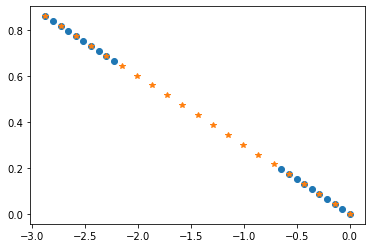

In [111]:
plt.plot(AA[:,0],AA[:,1],'o')
plt.plot(BB[:,0],BB[:,1],'*')

In [144]:
#init string need not be local minima
a=np.array([-.5,0.5])
b=np.array([0.5,.5])

# a=np.array([np.pi,np.pi])
# b=np.array([0.02,.01])


In [145]:
N=20
TOL=max(pow(N,-4),pow(10,-10))
dt=0.05*min(0.2,1/N)

In [146]:
TOL,dt

(6.25e-06, 0.0025000000000000005)

In [115]:
Init_string=Init_stringA(a,b,N)

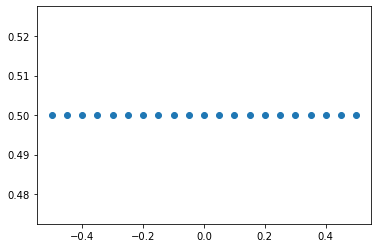

In [116]:
plt.plot(Init_string[:,0],Init_string[:,1],'o')

In [117]:
def String_Error(Phi,Phi_new):
    return [LA.norm(each)/dt for each in Phi-Phi_new]

In [147]:
MAXITER=10000#max iteration steps
steps=1
Phi=Init_stringA(a,b,N)
iter_error=[0]*(N+1)
start=time()
while 1:
    print('Iteration %d'%steps)
    Phi_new=np.zeros_like(Phi)#reset Phi_new
    #update string 
    for i in range(N+1):
        rg=rungeKutta(Phi[i,:],dt,gradient_V)
#         rg=euler(Phi[i,:],dt,gradient_V(Phi[i,:]))
#         iter_error[i]=LA.norm(rg)/dt
        Phi_new[i,:]=Phi[i,:]+rg#iteration scheme
    
    #reparameterization
    Phi=Repara(Phi_new,N)#update Phi
    steps+=1
    iter_error=String_Error(Phi,Phi_new)
    print(max(iter_error))
    print('\n')
    if max(iter_error)<TOL:#if d<TOL stop iteration
        print('converges after %d steps'%steps)
        break
    if steps>MAXITER:
        print('does not converge until %d iteration'%MAXITER)
        break
time_cost=time()-start

Iteration 1
22.79236945726947


Iteration 2
1.1212858072634817


Iteration 3
1.0830893391582834


Iteration 4
1.0853961869526192


Iteration 5
1.0874584371185703


Iteration 6
1.0892041393468914


Iteration 7
1.090640409461617


Iteration 8
1.091774878261605


Iteration 9
1.0926155002912268


Iteration 10
1.0931705246534091


Iteration 11
1.0934484649226006


Iteration 12
1.0934580680626043


Iteration 13
1.0932082826292466


Iteration 14
1.0927082265485022


Iteration 15
1.0919671547613556


Iteration 16
1.090994427029588


Iteration 17
1.089799476183646


Iteration 18
1.088391777084488


Iteration 19
1.086780816547704


Iteration 20
1.0849760644584994


Iteration 21
1.0829869462789492


Iteration 22
1.080822817114935


Iteration 23
1.07849293748943


Iteration 24
1.076006450922005


Iteration 25
1.0733723634015788


Iteration 26
1.0705995247897289


Iteration 27
1.0676966121794977


Iteration 28
1.0646721151977867


Iteration 29
1.0615343232185923


Iteration 30
1.058291314437041


I

0.8369061858548313


Iteration 272
0.8375139686447529


Iteration 273
0.8381215526430625


Iteration 274
0.8387288847242185


Iteration 275
0.8393359129605565


Iteration 276
0.8399425866026088


Iteration 277
0.840548856062539


Iteration 278
0.8411546728952468


Iteration 279
0.8417599897790097


Iteration 280
0.8423647605010832


Iteration 281
0.8429689399360994


Iteration 282
0.8435724840312929


Iteration 283
0.8441753497880347


Iteration 284
0.8447774952439646


Iteration 285
0.8453788794576919


Iteration 286
0.8459794624894998


Iteration 287
0.8465792053868816


Iteration 288
0.847178070165794


Iteration 289
0.8477760197956414


Iteration 290
0.8483730181826478


Iteration 291
0.8489690301530609


Iteration 292
0.8495640214381359


Iteration 293
0.8501579586577875


Iteration 294
0.8507508093042921


Iteration 295
0.8513425417289006


Iteration 296
0.8519331251248196


Iteration 297
0.8525225295113465


Iteration 298
0.8531107257221645


Iteration 299
0.853697685387526


It

0.9477760524534634


Iteration 552
0.9479707122462094


Iteration 553
0.9481644040438537


Iteration 554
0.9483571325203275


Iteration 555
0.9485489023303367


Iteration 556
0.94873971810903


Iteration 557
0.9489295844714288


Iteration 558
0.9491185060138774


Iteration 559
0.9493064873126659


Iteration 560
0.9494935329239559


Iteration 561
0.9496796473855553


Iteration 562
0.9498648352151391


Iteration 563
0.9500491009113259


Iteration 564
0.9502324489526669


Iteration 565
0.9504148837991278


Iteration 566
0.9505964098904843


Iteration 567
0.9507770316481907


Iteration 568
0.9509567534740727


Iteration 569
0.9511355797498464


Iteration 570
0.9513135148392603


Iteration 571
0.9514905630863388


Iteration 572
0.9516667288161662


Iteration 573
0.9518420163344187


Iteration 574
0.9520164299278606


Iteration 575
0.9521899738647752


Iteration 576
0.9523626523936745


Iteration 577
0.9525344697447135


Iteration 578
0.9527054301291193


Iteration 579
0.9528755377388824


I

0.9781395179689036


Iteration 854
0.97818226037763


Iteration 855
0.9782247884410948


Iteration 856
0.9782671032348759


Iteration 857
0.9783092058285248


Iteration 858
0.9783510972861243


Iteration 859
0.9783927786671677


Iteration 860
0.9784342510247526


Iteration 861
0.9784755154078728


Iteration 862
0.9785165728594222


Iteration 863
0.9785574244172976


Iteration 864
0.9785980711146768


Iteration 865
0.9786385139783752


Iteration 866
0.9786787540318503


Iteration 867
0.978718792290712


Iteration 868
0.9787586297686502


Iteration 869
0.9787982674724163


Iteration 870
0.978837706403279


Iteration 871
0.9788769475590939


Iteration 872
0.9789159919314752


Iteration 873
0.9789548405081012


Iteration 874
0.9789934942700721


Iteration 875
0.9790319541950497


Iteration 876
0.9790702212554875


Iteration 877
0.9791082964187487


Iteration 878
0.9791461806467462


Iteration 879
0.9791838748978692


Iteration 880
0.9792213801248867


Iteration 881
0.9792586972755738


Ite

0.9842499320374481


Iteration 1105
0.9842620356098921


Iteration 1106
0.9842740785024666


Iteration 1107
0.9842860610196825


Iteration 1108
0.9842979834643677


Iteration 1109
0.9843098461374089


Iteration 1110
0.9843216493389126


Iteration 1111
0.9843333933666976


Iteration 1112
0.9843450785179105


Iteration 1113
0.9843567050873322


Iteration 1114
0.9843682733685417


Iteration 1115
0.9843797836544627


Iteration 1116
0.9843912362355273


Iteration 1117
0.9844026314009892


Iteration 1118
0.9844139694388173


Iteration 1119
0.984425250635528


Iteration 1120
0.9844364752762891


Iteration 1121
0.9844476436440431


Iteration 1122
0.9844587560216042


Iteration 1123
0.9844698126894025


Iteration 1124
0.9844808139267793


Iteration 1125
0.9844917600119072


Iteration 1126
0.9845026512209604


Iteration 1127
0.984513487829345


Iteration 1128
0.9845242701106113


Iteration 1129
0.9845349983373788


Iteration 1130
0.9845456727805514


Iteration 1131
0.9845562937097535


Iteration

0.9860520403861481


Iteration 1378
0.9860551098778817


Iteration 1379
0.9860581639829891


Iteration 1380
0.9860612027786397


Iteration 1381
0.9860642263414688


Iteration 1382
0.9860672347484747


Iteration 1383
0.9860702280745811


Iteration 1384
0.9860732063961225


Iteration 1385
0.986076169788215


Iteration 1386
0.986079118325283


Iteration 1387
0.986082052082287


Iteration 1388
0.9860849711333273


Iteration 1389
0.9860878755518375


Iteration 1390
0.9860907654111973


Iteration 1391
0.9860936407843929


Iteration 1392
0.9860965017441508


Iteration 1393
0.9860993483630361


Iteration 1394
0.9861021807123267


Iteration 1395
0.9861049988637418


Iteration 1396
0.9861078028885002


Iteration 1397
0.9861105928576133


Iteration 1398
0.9861133688413419


Iteration 1399
0.9861161309098455


Iteration 1400
0.9861188791328206


Iteration 1401
0.9861216135798175


Iteration 1402
0.9861243343196263


Iteration 1403
0.9861270414212358


Iteration 1404
0.9861297349529311


Iteration 



Iteration 1664
0.9865196314755557


Iteration 1665
0.9865203570923775


Iteration 1666
0.9865210790717589


Iteration 1667
0.9865217974320627


Iteration 1668
0.9865225121917962


Iteration 1669
0.9865232233687254


Iteration 1670
0.986523930980516


Iteration 1671
0.9865246350457525


Iteration 1672
0.9865253355814856


Iteration 1673
0.9865260326058559


Iteration 1674
0.9865267261363503


Iteration 1675
0.9865274161905855


Iteration 1676
0.9865281027855551


Iteration 1677
0.9865287859393902


Iteration 1678
0.9865294656685758


Iteration 1679
0.9865301419905674


Iteration 1680
0.9865308149225702


Iteration 1681
0.9865314844812996


Iteration 1682
0.9865321506839134


Iteration 1683
0.9865328135470901


Iteration 1684
0.9865334730875481


Iteration 1685
0.9865341293223934


Iteration 1686
0.9865347822672796


Iteration 1687
0.9865354319396712


Iteration 1688
0.9865360783552293


Iteration 1689
0.986536721530834


Iteration 1690
0.9865373614821942


Iteration 1691
0.98653799822

0.9866280426246319


Iteration 1940
0.9866282248247248


Iteration 1941
0.9866284061110064


Iteration 1942
0.9866285864893942


Iteration 1943
0.9866287659626954


Iteration 1944
0.986628944537


Iteration 1945
0.9866291222159022


Iteration 1946
0.9866292990044597


Iteration 1947
0.9866294749065352


Iteration 1948
0.9866296499270587


Iteration 1949
0.986629824070258


Iteration 1950
0.9866299973404972


Iteration 1951
0.9866301697423042


Iteration 1952
0.9866303412798757


Iteration 1953
0.9866305119577347


Iteration 1954
0.9866306817799635


Iteration 1955
0.9866308507512465


Iteration 1956
0.9866310188750452


Iteration 1957
0.9866311861563989


Iteration 1958
0.9866313525991396


Iteration 1959
0.9866315182076517


Iteration 1960
0.9866316829861533


Iteration 1961
0.9866318469384214


Iteration 1962
0.9866320100691744


Iteration 1963
0.986632172382054


Iteration 1964
0.9866323338812936


Iteration 1965
0.9866324945712938


Iteration 1966
0.9866326544555706


Iteration 196

0.9866558844213841


Iteration 2229
0.9866559270633454


Iteration 2230
0.9866559694918848


Iteration 2231
0.9866560117071849


Iteration 2232
0.9866560537114016


Iteration 2233
0.986656095504944


Iteration 2234
0.9866561370889176


Iteration 2235
0.9866561784643625


Iteration 2236
0.9866562196325198


Iteration 2237
0.9866562605943902


Iteration 2238
0.9866563013506019


Iteration 2239
0.9866563419029855


Iteration 2240
0.9866563822519497


Iteration 2241
0.9866564223985947


Iteration 2242
0.986656462343974


Iteration 2243
0.9866565020891954


Iteration 2244
0.9866565416352623


Iteration 2245
0.98665658098297


Iteration 2246
0.9866566201334812


Iteration 2247
0.9866566590877341


Iteration 2248
0.9866566978468895


Iteration 2249
0.986656736411507


Iteration 2250
0.9866567747829348


Iteration 2251
0.9866568129620201


Iteration 2252
0.9866568509496648


Iteration 2253
0.986656888746938


Iteration 2254
0.9866569263549473


Iteration 2255
0.9866569637742897


Iteration 225

0.9866624104995421


Iteration 2519
0.9866624204295099


Iteration 2520
0.9866624303099176


Iteration 2521
0.986662440140223


Iteration 2522
0.9866624499217167


Iteration 2523
0.9866624596540674


Iteration 2524
0.9866624693375018


Iteration 2525
0.9866624789724946


Iteration 2526
0.9866624885592806


Iteration 2527
0.9866624980979871


Iteration 2528
0.9866625075887734


Iteration 2529
0.986662517031973


Iteration 2530
0.9866625264281155


Iteration 2531
0.9866625357767023


Iteration 2532
0.9866625450789411


Iteration 2533
0.9866625543342189


Iteration 2534
0.9866625635431953


Iteration 2535
0.9866625727059222


Iteration 2536
0.9866625818228223


Iteration 2537
0.9866625908940154


Iteration 2538
0.9866625999198536


Iteration 2539
0.9866626089001358


Iteration 2540
0.9866626178354593


Iteration 2541
0.9866626267262072


Iteration 2542
0.9866626355723925


Iteration 2543
0.9866626443740176


Iteration 2544
0.9866626531317191


Iteration 2545
0.9866626618455304


Iteration

0.9866638684577228


Iteration 2784
0.9866638710792611


Iteration 2785
0.9866638736880541


Iteration 2786
0.9866638762837396


Iteration 2787
0.98666387886638


Iteration 2788
0.9866638814364057


Iteration 2789
0.9866638839928856


Iteration 2790
0.9866638865369672


Iteration 2791
0.9866638890682462


Iteration 2792
0.9866638915867174


Iteration 2793
0.986663894092777


Iteration 2794
0.9866638965863185


Iteration 2795
0.9866638990670572


Iteration 2796
0.9866639015356216


Iteration 2797
0.9866639039914563


Iteration 2798
0.9866639064356019


Iteration 2799
0.9866639088668404


Iteration 2800
0.986663911286348


Iteration 2801
0.9866639136933343


Iteration 2802
0.9866639160885793


Iteration 2803
0.9866639184717465


Iteration 2804
0.9866639208429034


Iteration 2805
0.9866639232023737


Iteration 2806
0.9866639255496851


Iteration 2807
0.9866639278853621


Iteration 2808
0.9866639302094434


Iteration 2809
0.9866639325218928


Iteration 2810
0.9866639348224623


Iteration 2

0.9866642470257028


Iteration 3040
0.9866642477498285


Iteration 3041
0.9866642484707819


Iteration 3042
0.9866642491876055


Iteration 3043
0.9866642499011212


Iteration 3044
0.9866642506113312


Iteration 3045
0.9866642513174432


Iteration 3046
0.9866642520201531


Iteration 3047
0.9866642527193881


Iteration 3048
0.9866642534152053


Iteration 3049
0.9866642541075996


Iteration 3050
0.9866642547964096


Iteration 3051
0.9866642554816715


Iteration 3052
0.9866642561636565


Iteration 3053
0.9866642568422966


Iteration 3054
0.9866642575171622


Iteration 3055
0.9866642581889542


Iteration 3056
0.9866642588572762


Iteration 3057
0.9866642595223111


Iteration 3058
0.9866642601841654


Iteration 3059
0.9866642608423623


Iteration 3060
0.9866642614975716


Iteration 3061
0.9866642621490841


Iteration 3062
0.9866642627976955


Iteration 3063
0.9866642634429725


Iteration 3064
0.9866642640848343


Iteration 3065
0.9866642647239904


Iteration 3066
0.9866642653593611


Iterati

0.9866643595254814


Iteration 3340
0.9866643596858694


Iteration 3341
0.9866643598454544


Iteration 3342
0.9866643600041947


Iteration 3343
0.9866643601626328


Iteration 3344
0.9866643603194022


Iteration 3345
0.986664360475976


Iteration 3346
0.9866643606315935


Iteration 3347
0.9866643607863506


Iteration 3348
0.9866643609403591


Iteration 3349
0.9866643610938154


Iteration 3350
0.9866643612465756


Iteration 3351
0.9866643613980086


Iteration 3352
0.9866643615493769


Iteration 3353
0.9866643616992639


Iteration 3354
0.9866643618489009


Iteration 3355
0.9866643619976125


Iteration 3356
0.9866643621456228


Iteration 3357
0.9866643622928456


Iteration 3358
0.9866643624394535


Iteration 3359
0.9866643625855244


Iteration 3360
0.9866643627302107


Iteration 3361
0.9866643628746341


Iteration 3362
0.9866643630182125


Iteration 3363
0.9866643631611522


Iteration 3364
0.9866643633034639


Iteration 3365
0.9866643634447796


Iteration 3366
0.9866643635854593


Iteratio

0.986664383202876


Iteration 3608
0.986664383244451


Iteration 3609
0.9866643832863863


Iteration 3610
0.9866643833271608


Iteration 3611
0.9866643833684595


Iteration 3612
0.9866643834094925


Iteration 3613
0.9866643834498892


Iteration 3614
0.9866643834904579


Iteration 3615
0.9866643835306749


Iteration 3616
0.9866643835709674


Iteration 3617
0.9866643836107256


Iteration 3618
0.9866643836504105


Iteration 3619
0.9866643836898636


Iteration 3620
0.9866643837290117


Iteration 3621
0.9866643837681701


Iteration 3622
0.9866643838073705


Iteration 3623
0.9866643838457467


Iteration 3624
0.9866643838841752


Iteration 3625
0.986664383922617


Iteration 3626
0.9866643839607222


Iteration 3627
0.9866643839985747


Iteration 3628
0.9866643840363176


Iteration 3629
0.9866643840738182


Iteration 3630
0.9866643841114908


Iteration 3631
0.9866643841482298


Iteration 3632
0.9866643841853184


Iteration 3633
0.986664384222209


Iteration 3634
0.986664384259071


Iteration 36

0.9866643891916436


Iteration 3861
0.9866643892031035


Iteration 3862
0.9866643892148478


Iteration 3863
0.9866643892263313


Iteration 3864
0.9866643892380311


Iteration 3865
0.9866643892494285


Iteration 3866
0.9866643892608832


Iteration 3867
0.9866643892720721


Iteration 3868
0.9866643892834879


Iteration 3869
0.9866643892948931


Iteration 3870
0.9866643893058266


Iteration 3871
0.9866643893169763


Iteration 3872
0.9866643893280113


Iteration 3873
0.9866643893393099


Iteration 3874
0.9866643893500686


Iteration 3875
0.986664389360934


Iteration 3876
0.9866643893718807


Iteration 3877
0.9866643893824464


Iteration 3878
0.986664389393398


Iteration 3879
0.9866643894041229


Iteration 3880
0.9866643894146393


Iteration 3881
0.9866643894254842


Iteration 3882
0.9866643894357943


Iteration 3883
0.9866643894462143


Iteration 3884
0.9866643894567123


Iteration 3885
0.9866643894670408


Iteration 3886
0.9866643894776823


Iteration 3887
0.986664389487591


Iteration 


Iteration 4146
0.9866643909710178


Iteration 4147
0.9866643909740942


Iteration 4148
0.986664390976435


Iteration 4149
0.9866643909792531


Iteration 4150
0.9866643909821338


Iteration 4151
0.9866643909848449


Iteration 4152
0.9866643909874597


Iteration 4153
0.9866643909902572


Iteration 4154
0.9866643909929161


Iteration 4155
0.9866643909955986


Iteration 4156
0.986664390998401


Iteration 4157
0.986664391000828


Iteration 4158
0.9866643910036879


Iteration 4159
0.9866643910060339


Iteration 4160
0.9866643910088599


Iteration 4161
0.9866643910113156


Iteration 4162
0.9866643910138625


Iteration 4163
0.9866643910164773


Iteration 4164
0.9866643910189956


Iteration 4165
0.9866643910214564


Iteration 4166
0.9866643910240896


Iteration 4167
0.9866643910265739


Iteration 4168
0.9866643910290922


Iteration 4169
0.9866643910316392


Iteration 4170
0.9866643910342773


Iteration 4171
0.986664391036535


Iteration 4172
0.9866643910390583


Iteration 4173
0.98666439104156

0.9866643913931532


Iteration 4432
0.9866643913938206


Iteration 4433
0.9866643913945063


Iteration 4434
0.9866643913951971


Iteration 4435
0.9866643913956767


Iteration 4436
0.9866643913966466


Iteration 4437
0.9866643913971836


Iteration 4438
0.9866643913976918


Iteration 4439
0.9866643913985366


Iteration 4440
0.9866643913990006


Iteration 4441
0.9866643913997984


Iteration 4442
0.9866643914002727


Iteration 4443
0.9866643914009062


Iteration 4444
0.9866643914017744


Iteration 4445
0.9866643914022776


Iteration 4446
0.986664391402752


Iteration 4447
0.9866643914033751


Iteration 4448
0.9866643914041336


Iteration 4449
0.9866643914046705


Iteration 4450
0.986664391405192


Iteration 4451
0.9866643914058985


Iteration 4452
0.9866643914063963


Iteration 4453
0.9866643914069908


Iteration 4454
0.986664391407932


Iteration 4455
0.9866643914081169


Iteration 4456
0.9866643914088755


Iteration 4457
0.9866643914096135


Iteration 4458
0.9866643914099679


Iteration 

0.9866643914947605


Iteration 4722
0.9866643914949924


Iteration 4723
0.9866643914952715


Iteration 4724
0.9866643914952141


Iteration 4725
0.9866643914954513


Iteration 4726
0.9866643914955869


Iteration 4727
0.9866643914961266


Iteration 4728
0.9866643914956988


Iteration 4729
0.9866643914959493


Iteration 4730
0.9866643914961473


Iteration 4731
0.9866643914963403


Iteration 4732
0.9866643914965045


Iteration 4733
0.9866643914967027


Iteration 4734
0.9866643914967079


Iteration 4735
0.9866643914968772


Iteration 4736
0.9866643914970077


Iteration 4737
0.9866643914971145


Iteration 4738
0.9866643914973751


Iteration 4739
0.9866643914977272


Iteration 4740
0.986664391497602


Iteration 4741
0.9866643914977374


Iteration 4742
0.9866643914978496


Iteration 4743
0.986664391497907


Iteration 4744
0.9866643914982693


Iteration 4745
0.9866643914984572


Iteration 4746
0.9866643914983998


Iteration 4747
0.9866643914985691


Iteration 4748
0.9866643914987231


Iteration

0.9866643915167367


Iteration 4972
0.9866643915169584


Iteration 4973
0.9866643915169921


Iteration 4974
0.9866643915169687


Iteration 4975
0.9866643915170938


Iteration 4976
0.9866643915172529


Iteration 4977
0.9866643915171565


Iteration 4978
0.9866643915170991


Iteration 4979
0.9866643915171955


Iteration 4980
0.9866643915171147


Iteration 4981
0.986664391517331


Iteration 4982
0.9866643915174902


Iteration 4983
0.9866643915173702


Iteration 4984
0.9866643915174564


Iteration 4985
0.9866643915174564


Iteration 4986
0.9866643915174224


Iteration 4987
0.986664391517558


Iteration 4988
0.9866643915176257


Iteration 4989
0.9866643915175631


Iteration 4990
0.9866643915176936


Iteration 4991
0.9866643915177326


Iteration 4992
0.9866643915176936


Iteration 4993
0.986664391517829


Iteration 4994
0.9866643915179151


Iteration 4995
0.9866643915178629


Iteration 4996
0.9866643915177952


Iteration 4997
0.9866643915181472


Iteration 4998
0.9866643915179697


Iteration 

0.9866643915229178


Iteration 5203
0.9866643915228605


Iteration 5204
0.9866643915228605


Iteration 5205
0.9866643915230194


Iteration 5206
0.9866643915229568


Iteration 5207
0.9866643915229281


Iteration 5208
0.9866643915228994


Iteration 5209
0.9866643915232411


Iteration 5210
0.9866643915229333


Iteration 5211
0.9866643915230143


Iteration 5212
0.9866643915229959


Iteration 5213
0.9866643915231107


Iteration 5214
0.9866643915231837


Iteration 5215
0.9866643915229907


Iteration 5216
0.9866643915231211


Iteration 5217
0.9866643915231837


Iteration 5218
0.9866643915230976


Iteration 5219
0.9866643915231837


Iteration 5220
0.986664391523275


Iteration 5221
0.9866643915232411


Iteration 5222
0.986664391523275


Iteration 5223
0.9866643915232124


Iteration 5224
0.9866643915231887


Iteration 5225
0.986664391523275


Iteration 5226
0.9866643915231602


Iteration 5227
0.9866643915231159


Iteration 5228
0.9866643915234391


Iteration 5229
0.9866643915233428


Iteration 

0.9866643915251075


Iteration 5508
0.9866643915250397


Iteration 5509
0.9866643915250449


Iteration 5510
0.986664391525204


Iteration 5511
0.9866643915250112


Iteration 5512
0.9866643915250397


Iteration 5513
0.9866643915250294


Iteration 5514
0.9866643915250397


Iteration 5515
0.9866643915250449


Iteration 5516
0.9866643915252379


Iteration 5517
0.986664391525006


Iteration 5518
0.9866643915252562


Iteration 5519
0.9866643915249537


Iteration 5520
0.9866643915251312


Iteration 5521
0.986664391525006


Iteration 5522
0.9866643915250972


Iteration 5523
0.9866643915250686


Iteration 5524
0.9866643915250972


Iteration 5525
0.9866643915249537


Iteration 5526
0.9866643915252431


Iteration 5527
0.9866643915251598


Iteration 5528
0.9866643915251312


Iteration 5529
0.9866643915250449


Iteration 5530
0.9866643915251312


Iteration 5531
0.9866643915250449


Iteration 5532
0.9866643915251312


Iteration 5533
0.986664391525204


Iteration 5534
0.986664391525204


Iteration 55

0.9866643915255038


Iteration 5828
0.9866643915255325


Iteration 5829
0.9866643915254699


Iteration 5830
0.9866643915256629


Iteration 5831
0.9866643915253551


Iteration 5832
0.9866643915255716


Iteration 5833
0.9866643915257203


Iteration 5834
0.9866643915254073


Iteration 5835
0.9866643915255429


Iteration 5836
0.9866643915254073


Iteration 5837
0.9866643915256629


Iteration 5838
0.986664391525548


Iteration 5839
0.9866643915255664


Iteration 5840
0.9866643915254125


Iteration 5841
0.9866643915254516


Iteration 5842
0.986664391525548


Iteration 5843
0.9866643915255664


Iteration 5844
0.9866643915254933


Iteration 5845
0.9866643915254751


Iteration 5846
0.9866643915256916


Iteration 5847
0.9866643915254699


Iteration 5848
0.9866643915255038


Iteration 5849
0.9866643915254804


Iteration 5850
0.9866643915255612


Iteration 5851
0.9866643915255716


Iteration 5852
0.9866643915255716


Iteration 5853
0.9866643915254125


Iteration 5854
0.9866643915255768


Iteration

0.9866643915255768


Iteration 6063
0.9866643915255378


Iteration 6064
0.9866643915255768


Iteration 6065
0.9866643915257931


Iteration 6066
0.9866643915256681


Iteration 6067
0.9866643915254464


Iteration 6068
0.9866643915255952


Iteration 6069
0.9866643915255716


Iteration 6070
0.9866643915256577


Iteration 6071
0.9866643915256342


Iteration 6072
0.9866643915256342


Iteration 6073
0.986664391525629


Iteration 6074
0.9866643915255142


Iteration 6075
0.9866643915257542


Iteration 6076
0.9866643915256681


Iteration 6077
0.9866643915256395


Iteration 6078
0.9866643915256055


Iteration 6079
0.9866643915256055


Iteration 6080
0.9866643915257881


Iteration 6081
0.9866643915256055


Iteration 6082
0.9866643915257542


Iteration 6083
0.9866643915256158


Iteration 6084
0.9866643915256055


Iteration 6085
0.9866643915256055


Iteration 6086
0.9866643915255716


Iteration 6087
0.9866643915255716


Iteration 6088
0.9866643915257881


Iteration 6089
0.9866643915256342


Iteratio

0.9866643915256681


Iteration 6306
0.9866643915256681


Iteration 6307
0.9866643915256055


Iteration 6308
0.9866643915257542


Iteration 6309
0.9866643915256395


Iteration 6310
0.9866643915257255


Iteration 6311
0.986664391525509


Iteration 6312
0.9866643915256107


Iteration 6313
0.9866643915257931


Iteration 6314
0.9866643915255664


Iteration 6315
0.9866643915257985


Iteration 6316
0.9866643915256055


Iteration 6317
0.9866643915257645


Iteration 6318
0.9866643915256629


Iteration 6319
0.986664391525629


Iteration 6320
0.9866643915255429


Iteration 6321
0.9866643915257931


Iteration 6322
0.9866643915255038


Iteration 6323
0.9866643915256733


Iteration 6324
0.9866643915257985


Iteration 6325
0.9866643915256733


Iteration 6326
0.9866643915256003


Iteration 6327
0.9866643915256395


Iteration 6328
0.9866643915255194


Iteration 6329
0.9866643915256577


Iteration 6330
0.9866643915256055


Iteration 6331
0.9866643915257881


Iteration 6332
0.9866643915256577


Iteration

0.9866643915255429


Iteration 6580
0.986664391525822


Iteration 6581
0.9866643915255716


Iteration 6582
0.9866643915256681


Iteration 6583
0.9866643915256916


Iteration 6584
0.986664391525509


Iteration 6585
0.9866643915256968


Iteration 6586
0.9866643915256055


Iteration 6587
0.9866643915257931


Iteration 6588
0.9866643915257307


Iteration 6589
0.9866643915256342


Iteration 6590
0.9866643915258272


Iteration 6591
0.9866643915257018


Iteration 6592
0.986664391525509


Iteration 6593
0.9866643915257018


Iteration 6594
0.9866643915256003


Iteration 6595
0.9866643915256733


Iteration 6596
0.9866643915256395


Iteration 6597
0.9866643915256342


Iteration 6598
0.9866643915256395


Iteration 6599
0.9866643915257645


Iteration 6600
0.986664391525548


Iteration 6601
0.9866643915258035


Iteration 6602
0.9866643915257359


Iteration 6603
0.9866643915254804


Iteration 6604
0.9866643915257018


Iteration 6605
0.9866643915255038


Iteration 6606
0.986664391525822


Iteration 66

0.9866643915256497


Iteration 6850
0.9866643915256395


Iteration 6851
0.9866643915256395


Iteration 6852
0.9866643915255664


Iteration 6853
0.9866643915256577


Iteration 6854
0.9866643915256158


Iteration 6855
0.9866643915256444


Iteration 6856
0.9866643915259862


Iteration 6857
0.9866643915255429


Iteration 6858
0.9866643915257018


Iteration 6859
0.9866643915256968


Iteration 6860
0.9866643915256395


Iteration 6861
0.9866643915257697


Iteration 6862
0.9866643915256444


Iteration 6863
0.9866643915256444


Iteration 6864
0.9866643915256968


Iteration 6865
0.9866643915256342


Iteration 6866
0.9866643915259236


Iteration 6867
0.9866643915256577


Iteration 6868
0.9866643915256916


Iteration 6869
0.986664391525822


Iteration 6870
0.9866643915256395


Iteration 6871
0.9866643915257931


Iteration 6872
0.9866643915257071


Iteration 6873
0.9866643915256629


Iteration 6874
0.986664391525822


Iteration 6875
0.9866643915257307


Iteration 6876
0.9866643915256629


Iteration

0.9866643915256055


Iteration 7086
0.9866643915257931


Iteration 7087
0.9866643915255952


Iteration 7088
0.9866643915256497


Iteration 7089
0.9866643915255429


Iteration 7090
0.986664391525822


Iteration 7091
0.9866643915256342


Iteration 7092
0.9866643915255716


Iteration 7093
0.986664391525629


Iteration 7094
0.9866643915257985


Iteration 7095
0.986664391525548


Iteration 7096
0.9866643915255716


Iteration 7097
0.9866643915256916


Iteration 7098
0.9866643915256158


Iteration 7099
0.9866643915257307


Iteration 7100
0.9866643915256003


Iteration 7101
0.9866643915256681


Iteration 7102
0.9866643915256395


Iteration 7103
0.9866643915254804


Iteration 7104
0.986664391525822


Iteration 7105
0.9866643915255664


Iteration 7106
0.9866643915256444


Iteration 7107
0.9866643915256733


Iteration 7108
0.9866643915257645


Iteration 7109
0.9866643915257645


Iteration 7110
0.9866643915258323


Iteration 7111
0.9866643915255429


Iteration 7112
0.9866643915256395


Iteration 7

0.986664391525822


Iteration 7400
0.9866643915255429


Iteration 7401
0.9866643915256055


Iteration 7402
0.9866643915256444


Iteration 7403
0.9866643915256681


Iteration 7404
0.9866643915256395


Iteration 7405
0.9866643915256681


Iteration 7406
0.9866643915256395


Iteration 7407
0.9866643915256681


Iteration 7408
0.9866643915256444


Iteration 7409
0.9866643915255716


Iteration 7410
0.9866643915256681


Iteration 7411
0.9866643915256497


Iteration 7412
0.9866643915257697


Iteration 7413
0.9866643915256444


Iteration 7414
0.9866643915257881


Iteration 7415
0.9866643915256342


Iteration 7416
0.9866643915256395


Iteration 7417
0.9866643915257203


Iteration 7418
0.9866643915255768


Iteration 7419
0.9866643915258272


Iteration 7420
0.9866643915256497


Iteration 7421
0.9866643915256395


Iteration 7422
0.9866643915255664


Iteration 7423
0.9866643915256681


Iteration 7424
0.9866643915259288


Iteration 7425
0.9866643915256107


Iteration 7426
0.9866643915256342


Iteratio

0.986664391525629


Iteration 7638
0.9866643915256681


Iteration 7639
0.9866643915256107


Iteration 7640
0.9866643915256342


Iteration 7641
0.9866643915256444


Iteration 7642
0.9866643915259758


Iteration 7643
0.9866643915255768


Iteration 7644
0.9866643915256681


Iteration 7645
0.9866643915256681


Iteration 7646
0.9866643915256629


Iteration 7647
0.9866643915256733


Iteration 7648
0.9866643915256055


Iteration 7649
0.9866643915257018


Iteration 7650
0.9866643915256444


Iteration 7651
0.9866643915256681


Iteration 7652
0.9866643915255378


Iteration 7653
0.9866643915256968


Iteration 7654
0.9866643915256342


Iteration 7655
0.986664391525548


Iteration 7656
0.9866643915259522


Iteration 7657
0.9866643915256342


Iteration 7658
0.9866643915256342


Iteration 7659
0.9866643915256395


Iteration 7660
0.9866643915256681


Iteration 7661
0.9866643915256444


Iteration 7662
0.9866643915256681


Iteration 7663
0.9866643915256055


Iteration 7664
0.9866643915256681


Iteration

0.9866643915256733


Iteration 7930
0.9866643915256055


Iteration 7931
0.9866643915256577


Iteration 7932
0.9866643915256395


Iteration 7933
0.9866643915257018


Iteration 7934
0.9866643915258559


Iteration 7935
0.9866643915256629


Iteration 7936
0.9866643915255716


Iteration 7937
0.9866643915257359


Iteration 7938
0.9866643915256395


Iteration 7939
0.9866643915256733


Iteration 7940
0.9866643915257931


Iteration 7941
0.9866643915255429


Iteration 7942
0.9866643915256395


Iteration 7943
0.9866643915256444


Iteration 7944
0.9866643915256733


Iteration 7945
0.9866643915256395


Iteration 7946
0.9866643915256733


Iteration 7947
0.9866643915255716


Iteration 7948
0.9866643915258035


Iteration 7949
0.9866643915256916


Iteration 7950
0.9866643915256681


Iteration 7951
0.9866643915256733


Iteration 7952
0.9866643915257071


Iteration 7953
0.9866643915256395


Iteration 7954
0.9866643915258323


Iteration 7955
0.9866643915256342


Iteration 7956
0.9866643915256784


Iterati

0.9866643915256395


Iteration 8229
0.9866643915256497


Iteration 8230
0.9866643915256395


Iteration 8231
0.9866643915256733


Iteration 8232
0.9866643915256629


Iteration 8233
0.9866643915256055


Iteration 8234
0.9866643915256395


Iteration 8235
0.9866643915256968


Iteration 8236
0.9866643915257123


Iteration 8237
0.9866643915256342


Iteration 8238
0.9866643915256342


Iteration 8239
0.9866643915256681


Iteration 8240
0.9866643915256733


Iteration 8241
0.9866643915256342


Iteration 8242
0.9866643915257018


Iteration 8243
0.9866643915256629


Iteration 8244
0.9866643915256107


Iteration 8245
0.9866643915256395


Iteration 8246
0.9866643915255378


Iteration 8247
0.9866643915256549


Iteration 8248
0.9866643915257645


Iteration 8249
0.9866643915257359


Iteration 8250
0.9866643915256968


Iteration 8251
0.9866643915256629


Iteration 8252
0.9866643915255768


Iteration 8253
0.9866643915257018


Iteration 8254
0.9866643915256681


Iteration 8255
0.9866643915257645


Iterati

Iteration 8523
0.9866643915256342


Iteration 8524
0.9866643915257255


Iteration 8525
0.9866643915255429


Iteration 8526
0.9866643915256733


Iteration 8527
0.9866643915256681


Iteration 8528
0.9866643915256681


Iteration 8529
0.9866643915255716


Iteration 8530
0.9866643915256629


Iteration 8531
0.9866643915256629


Iteration 8532
0.9866643915256784


Iteration 8533
0.9866643915257255


Iteration 8534
0.9866643915256003


Iteration 8535
0.9866643915256395


Iteration 8536
0.986664391525629


Iteration 8537
0.986664391525629


Iteration 8538
0.9866643915257931


Iteration 8539
0.9866643915256055


Iteration 8540
0.9866643915256342


Iteration 8541
0.9866643915258272


Iteration 8542
0.9866643915256342


Iteration 8543
0.9866643915256395


Iteration 8544
0.9866643915256395


Iteration 8545
0.9866643915258505


Iteration 8546
0.9866643915255716


Iteration 8547
0.9866643915256055


Iteration 8548
0.9866643915257071


Iteration 8549
0.9866643915256444


Iteration 8550
0.9866643915260

0.9866643915256342


Iteration 8773
0.9866643915256395


Iteration 8774
0.9866643915258168


Iteration 8775
0.9866643915256003


Iteration 8776
0.9866643915256342


Iteration 8777
0.9866643915256681


Iteration 8778
0.9866643915256681


Iteration 8779
0.9866643915255429


Iteration 8780
0.9866643915257985


Iteration 8781
0.9866643915256733


Iteration 8782
0.9866643915256681


Iteration 8783
0.9866643915256342


Iteration 8784
0.9866643915256968


Iteration 8785
0.9866643915258272


Iteration 8786
0.9866643915256107


Iteration 8787
0.9866643915256342


Iteration 8788
0.9866643915256342


Iteration 8789
0.9866643915256497


Iteration 8790
0.9866643915256395


Iteration 8791
0.9866643915256733


Iteration 8792
0.9866643915256444


Iteration 8793
0.9866643915255429


Iteration 8794
0.9866643915258272


Iteration 8795
0.9866643915256629


Iteration 8796
0.9866643915257018


Iteration 8797
0.9866643915255716


Iteration 8798
0.9866643915256395


Iteration 8799
0.9866643915258559


Iterati

0.9866643915256395


Iteration 9026
0.9866643915256395


Iteration 9027
0.9866643915256577


Iteration 9028
0.9866643915255378


Iteration 9029
0.9866643915256968


Iteration 9030
0.9866643915256681


Iteration 9031
0.9866643915256681


Iteration 9032
0.9866643915256395


Iteration 9033
0.9866643915255664


Iteration 9034
0.9866643915256681


Iteration 9035
0.9866643915256003


Iteration 9036
0.986664391525629


Iteration 9037
0.9866643915255716


Iteration 9038
0.9866643915256681


Iteration 9039
0.9866643915256681


Iteration 9040
0.9866643915257018


Iteration 9041
0.986664391525629


Iteration 9042
0.9866643915255768


Iteration 9043
0.9866643915259758


Iteration 9044
0.9866643915256681


Iteration 9045
0.9866643915256055


Iteration 9046
0.9866643915256681


Iteration 9047
0.9866643915256916


Iteration 9048
0.9866643915256681


Iteration 9049
0.9866643915256003


Iteration 9050
0.9866643915256629


Iteration 9051
0.9866643915256055


Iteration 9052
0.9866643915256733


Iteration

0.9866643915255142


Iteration 9303
0.9866643915257018


Iteration 9304
0.9866643915256395


Iteration 9305
0.9866643915255716


Iteration 9306
0.9866643915256916


Iteration 9307
0.9866643915256395


Iteration 9308
0.9866643915256681


Iteration 9309
0.9866643915256681


Iteration 9310
0.9866643915256107


Iteration 9311
0.9866643915256681


Iteration 9312
0.9866643915256681


Iteration 9313
0.9866643915256629


Iteration 9314
0.9866643915256107


Iteration 9315
0.9866643915256107


Iteration 9316
0.9866643915260148


Iteration 9317
0.9866643915256055


Iteration 9318
0.9866643915256342


Iteration 9319
0.9866643915256055


Iteration 9320
0.9866643915256342


Iteration 9321
0.9866643915256681


Iteration 9322
0.9866643915256342


Iteration 9323
0.9866643915256916


Iteration 9324
0.9866643915258323


Iteration 9325
0.9866643915256395


Iteration 9326
0.9866643915256968


Iteration 9327
0.9866643915256733


Iteration 9328
0.986664391525509


Iteration 9329
0.9866643915256681


Iteratio

0.9866643915259862


Iteration 9551
0.9866643915257307


Iteration 9552
0.9866643915256629


Iteration 9553
0.986664391525548


Iteration 9554
0.9866643915256395


Iteration 9555
0.9866643915256681


Iteration 9556
0.986664391525629


Iteration 9557
0.986664391525629


Iteration 9558
0.9866643915256003


Iteration 9559
0.9866643915259522


Iteration 9560
0.9866643915255429


Iteration 9561
0.9866643915256395


Iteration 9562
0.9866643915257931


Iteration 9563
0.9866643915256395


Iteration 9564
0.9866643915256055


Iteration 9565
0.9866643915255142


Iteration 9566
0.9866643915260096


Iteration 9567
0.9866643915257018


Iteration 9568
0.9866643915256681


Iteration 9569
0.9866643915256055


Iteration 9570
0.9866643915256968


Iteration 9571
0.9866643915256342


Iteration 9572
0.9866643915256629


Iteration 9573
0.9866643915255768


Iteration 9574
0.9866643915259758


Iteration 9575
0.9866643915255768


Iteration 9576
0.9866643915259758


Iteration 9577
0.9866643915256107


Iteration 

0.9866643915256342


Iteration 9822
0.9866643915256055


Iteration 9823
0.9866643915256342


Iteration 9824
0.9866643915256681


Iteration 9825
0.9866643915256395


Iteration 9826
0.9866643915257071


Iteration 9827
0.9866643915256395


Iteration 9828
0.9866643915256733


Iteration 9829
0.9866643915256629


Iteration 9830
0.9866643915255952


Iteration 9831
0.9866643915256733


Iteration 9832
0.986664391525629


Iteration 9833
0.9866643915256968


Iteration 9834
0.9866643915256342


Iteration 9835
0.9866643915256342


Iteration 9836
0.9866643915256395


Iteration 9837
0.9866643915256681


Iteration 9838
0.986664391525981


Iteration 9839
0.9866643915256342


Iteration 9840
0.9866643915255532


Iteration 9841
0.9866643915256395


Iteration 9842
0.9866643915256497


Iteration 9843
0.9866643915256003


Iteration 9844
0.9866643915256003


Iteration 9845
0.986664391525749


Iteration 9846
0.9866643915256395


Iteration 9847
0.9866643915256733


Iteration 9848
0.9866643915256342


Iteration 

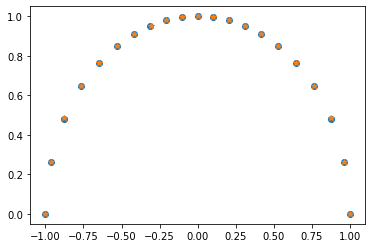

In [137]:
plt.plot(Phi_new[:,0],Phi_new[:,1],'o')
plt.plot(Phi[:,0],Phi[:,1],'*')

In [148]:
s=[]
length=len(Phi)
s.append(0)#s_0=0
for i in range(length-1):
    s.append(s[i]+np.exp(0.5*V(Phi[i+1,:])+0.5*V(Phi[i,:]))*LA.norm(Phi[i+1,:]-Phi[i,:]))
#     s.append(s[i]+LA.norm(Phi[i+1,:]-Phi[i,:]))
alpha=np.array(s)/s[-1]

In [149]:
zfinal=list(map(V,Phi))

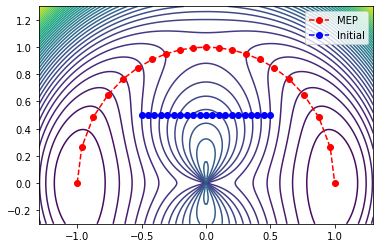

In [150]:
plt.plot(Phi[:,0],Phi[:,1],'--ro')
plt.contour(X,Y,Z,50)
plt.plot(Init_string[:,0],Init_string[:,1],'b--o')
plt.legend(['MEP','Initial'])

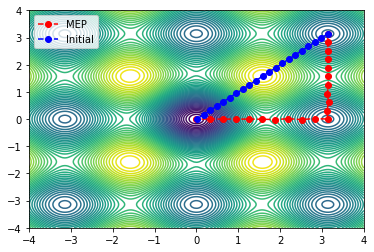

In [63]:
plt.plot(Phi[:,0],Phi[:,1],'--ro')
plt.contour(X,Y,Z,50)
plt.plot(Init_string[:,0],Init_string[:,1],'b--o')
plt.legend(['MEP','Initial'])

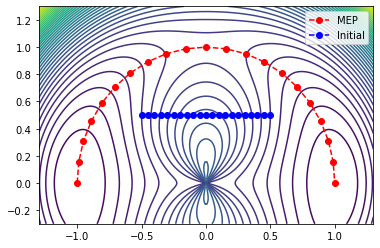

In [123]:
plt.plot(Phi[:,0],Phi[:,1],'--ro')
plt.contour(X,Y,Z,50)
plt.plot(Init_string[:,0],Init_string[:,1],'b--o')
plt.legend(['MEP','Initial'])

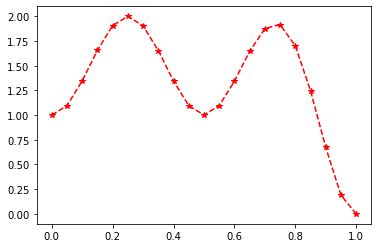

In [64]:
plt.plot(alpha,zfinal,'--r*')

## Climbing string

In [83]:
maxid=0
length=len(zfinal)
for i in range(length):
    if zfinal[i]>zfinal[maxid]:
        maxid=i
        
sec=0
for i in range(maxid+5,length):
    if zfinal[i]>zfinal[sec]:
        sec=i

In [84]:
LA.norm(gradient_V(Phi[maxid])),LA.norm(gradient_V(Phi[sec]))

(0.0062009426721489624, 0.25868414048921284)

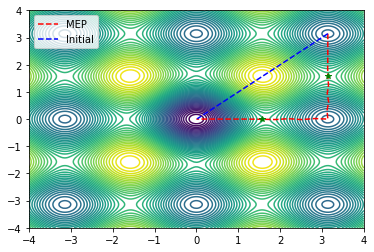

In [81]:
plt.plot(Phi[:,0],Phi[:,1],'--r')
plt.contour(X,Y,Z,50)
plt.plot(Init_string[:,0],Init_string[:,1],'b--')
plt.legend(['MEP','Initial'])
plt.plot(Phi[maxid,0],Phi[maxid,1],'g*')
plt.plot(Phi[sec,0],Phi[sec,1],'g*')

In [86]:
def tao(Phi,z):
    '''
    Phi: discretized string
    z:function value of string
    '''
    s=zfinal.index(max(zfinal))#the index of saddle point in the string 
    if z[s+1]>z[s]>z[s-1]:
        e=Phi[s+1]-Phi[s]
    elif z[s+1]<z[s]<z[s-1]:
        e=Phi[s]-Phi[s-1]
    else:
        e=Phi[s+1]-Phi[s-1]
    return e/LA.norm(e)

In [91]:
e=Phi[maxid+1]-Phi[maxid-1]
e/LA.norm(e)

array([ 0.03187226, -0.99949195])

In [92]:
tao_h=tao(Phi,zfinal)

In [79]:
np.matmul(tao(Phi,zfinal),phi_s)

5.174352291533589e-15

In [93]:
def sd_dynamic(phi,tao=tao_h):
    gradient=gradient_V(phi)
    return gradient-2*np.matmul(tao,gradient)*tao

In [96]:
rf_sd=Phi[sec]
ac_sd=0*rf_sd

In [101]:
MAXITER=200#max iteration steps
steps=1
# start=time()
while 1:
    rg=rungeKutta(rf_sd,dt,sd_dynamic)
#         rg=euler(Phi[i,:],dt,gradient_V(Phi[i,:]))
    error=LA.norm(rg)/dt
    ac_sd=rf_sd+rg
    steps+=1
    print(error)
    print('\n')
    if error<TOL:#if d<TOL stop iteration
        print('converges after %d steps'%steps)
        break
    if steps>MAXITER:
        print('does not converge until %d iteration'%MAXITER)
        break
    rf_sd=ac_sd

0.2585125059095761


0.258855478391888


0.2591989226044752


0.2595428392213428


0.25988722891745103


0.26023209236871786


0.26057743025201746


0.26092324324518423


0.261269532027012


0.26161629727725405


0.26196353967662805


0.262311259906813


0.2626594586504511


0.2630081365911512


0.26335729441348743


0.2637069328030007


0.2640570524462004


0.2644076540305645


0.2647587382445417


0.26511030577755035


0.2654623573199826


0.26581489356320237


0.26616791519954924


0.26652142292233577


0.2668754174258531


0.2672298994053673


0.2675848695571237


0.2679403285783467


0.2682962771672406


0.2686527160229918


0.26900964584576803


0.26936706733671917


0.269724981197982


0.27008338813267546


0.2704422888449064


0.27080168403976834


0.2711615744233434


0.2715219607027024


0.27188284358590564


0.27224422378200586


0.27260610200104674


0.27296847895406573


0.2733313553530935


0.2736947319111565


0.27405860934227694


0.2744229883614739


0.2747878696847642

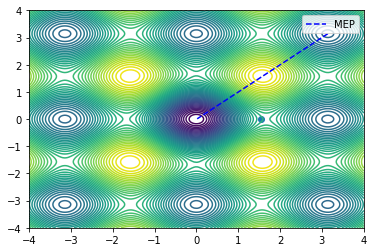

In [114]:
# plt.plot(Phi[:,0],Phi[:,1],'--r')
plt.contour(X,Y,Z,50)
plt.plot(Init_string[:,0],Init_string[:,1],'b--')
plt.legend(['MEP','Initial'])
# plt.plot(Phi[maxid,0],Phi[maxid,1],'g*')
# plt.plot(Phi[sec,0],Phi[sec,1],'g*')
plt.scatter(ac_sd[0],ac_sd[1])

In [108]:
ac_sd[0]

1.5444860892892758

In [104]:
LA.norm(gradient_V(ac_sd)),LA.norm(gradient_V(Phi[sec]))

(0.33767019417368316, 0.25868414048921284)

In [90]:
phi_s

array([3.67181626e-09, 1.00061875e-02])

截取一段string，能量上升到粗糙的鞍点，运用climbing string


In [118]:
I_string=Phi[:maxid+1,:]

In [123]:
N=len(I_string)-1
TOL=max(pow(N,-4),pow(10,-10))
dt=0.05*min(0.2,1/N)

In [125]:
I_string[N],Phi[maxid]

(array([3.14137896, 1.56770923]), array([3.14137896, 1.56770923]))

In [ ]:
def sd_dynamic(phi,tao=tao_h):
    gradient=gradient_V(phi)
    return gradient-2*np.matmul(tao,gradient)*tao

In [138]:
his_error=[]

In [139]:
MAXITER=2500#max iteration steps
steps=1
Phi=I_string
iter_error=[0]*(N+1)
start=time()
while 1:
    print('Iteration %d'%steps)
    Phi_new=np.zeros_like(Phi)#reset Phi_new
    #update string except the saddle point
    for i in range(N):
        rg=rungeKutta(Phi[i,:],dt,gradient_V)
#         rg=euler(Phi[i,:],dt,gradient_V(Phi[i,:]))
        iter_error[i]=LA.norm(rg)/dt
        Phi_new[i,:]=Phi[i,:]+rg#iteration scheme
        
    #saddle point update
    difference=Phi[-1]-Phi[-2]
    tao=difference/LA.norm(difference)
    rg=rungeKutta(Phi[-1],dt,lambda x:sd_dynamic(x,tao))
    iter_error[N]=LA.norm(rg)/dt
    Phi_new[N,:]=Phi[N,:]+rg
    
    #reparameterization
    Phi=Repara(Phi_new,N)#update Phi
#     iter_error=list(map(gradient_V,Phi))
    steps+=1
    ee=max(iter_error)
    his_error.append(ee)
    print(ee)
    print('\n')
    if ee<TOL:#if d<TOL stop iteration
        print('converges after %d steps'%steps)
        break
    if steps>MAXITER:
        print('does not converge until %d iteration'%MAXITER)
        break
time_cost=time()-start

Iteration 1
0.9546905748419536


Iteration 2
0.9546752903374123


Iteration 3
0.9546603944541201


Iteration 4
0.9546458029634487


Iteration 5
0.9546315096993903


Iteration 6
0.9546175086207448


Iteration 7
0.9546037938003151


Iteration 8
0.9545903594234955


Iteration 9
0.95457719978675


Iteration 10
0.9545643092959967


Iteration 11
0.9545516824649156


Iteration 12
0.9545393139132047


Iteration 13
0.9545271983647944


Iteration 14
0.9545153306460352


Iteration 15
0.9545037056838805


Iteration 16
0.954492318504057


Iteration 17
0.9544811642292532


Iteration 18
0.9544702380773241


Iteration 19
0.9544595353595151


Iteration 20
0.9544490514787212


Iteration 21
0.9544387819277788


Iteration 22
0.9544287222877973


Iteration 23
0.954418868226529


Iteration 24
0.9544092154967841


Iteration 25
0.9543997599348925


Iteration 26
0.9543904974592041


Iteration 27
0.9543814240686417


Iteration 28
0.9543725358412858


Iteration 29
0.9543638289330134


Iteration 30
0.954355299576

0.9539447139795935


Iteration 270
0.9539446506713953


Iteration 271
0.9539445886421207


Iteration 272
0.953944527865943


Iteration 273
0.9539444683175522


Iteration 274
0.9539444099721514


Iteration 275
0.9539443528054445


Iteration 276
0.9539442967936241


Iteration 277
0.9539442419133632


Iteration 278
0.9539441881418066


Iteration 279
0.9539441354565602


Iteration 280
0.9539440838356816


Iteration 281
0.9539440332576704


Iteration 282
0.9539439837014605


Iteration 283
0.953943935146412


Iteration 284
0.9539438875723


Iteration 285
0.9539438409593094


Iteration 286
0.9539437952880243


Iteration 287
0.9539437505394198


Iteration 288
0.9539437066948567


Iteration 289
0.9539436637360716


Iteration 290
0.9539436216451692


Iteration 291
0.9539435804046155


Iteration 292
0.9539435399972315


Iteration 293
0.9539435004061841


Iteration 294
0.9539434616149797


Iteration 295
0.9539434236074602


Iteration 296
0.9539433863677914


Iteration 297
0.953943349880458


Itera


Iteration 631
0.9539415821608421


Iteration 632
0.9539415821216739


Iteration 633
0.9539415820832966


Iteration 634
0.9539415820456953


Iteration 635
0.9539415820088536


Iteration 636
0.9539415819727554


Iteration 637
0.9539415819373873


Iteration 638
0.9539415819027333


Iteration 639
0.953941581868779


Iteration 640
0.9539415818355111


Iteration 641
0.9539415818029158


Iteration 642
0.9539415817709782


Iteration 643
0.9539415817396862


Iteration 644
0.9539415817090258


Iteration 645
0.9539415816789855


Iteration 646
0.9539415816495511


Iteration 647
0.9539415816207123


Iteration 648
0.9539415815924558


Iteration 649
0.9539415815647697


Iteration 650
0.953941581537643


Iteration 651
0.9539415815110648


Iteration 652
0.9539415814850236


Iteration 653
0.9539415814595076


Iteration 654
0.9539415814345081


Iteration 655
0.9539415814100123


Iteration 656
0.9539415813860126


Iteration 657
0.9539415813624972


Iteration 658
0.9539415813394571


Iteration 659
0.95394

0.9539415802271033


Iteration 923
0.9539415802270003


Iteration 924
0.9539415802268991


Iteration 925
0.9539415802267999


Iteration 926
0.9539415802267027


Iteration 927
0.9539415802266077


Iteration 928
0.9539415802265142


Iteration 929
0.9539415802264228


Iteration 930
0.9539415802263336


Iteration 931
0.953941580226246


Iteration 932
0.9539415802261605


Iteration 933
0.9539415802260759


Iteration 934
0.9539415802259936


Iteration 935
0.9539415802259122


Iteration 936
0.9539415802258339


Iteration 937
0.9539415802257558


Iteration 938
0.9539415802256805


Iteration 939
0.953941580225605


Iteration 940
0.9539415802255329


Iteration 941
0.9539415802254614


Iteration 942
0.9539415802253917


Iteration 943
0.9539415802253223


Iteration 944
0.953941580225255


Iteration 945
0.9539415802251896


Iteration 946
0.9539415802251247


Iteration 947
0.9539415802250613


Iteration 948
0.953941580225


Iteration 949
0.9539415802249392


Iteration 950
0.9539415802248796


Iterat

0.9539415802220091


Iteration 1211
0.9539415802220077


Iteration 1212
0.9539415802220081


Iteration 1213
0.9539415802220081


Iteration 1214
0.9539415802220077


Iteration 1215
0.9539415802220073


Iteration 1216
0.9539415802220073


Iteration 1217
0.9539415802220069


Iteration 1218
0.9539415802220061


Iteration 1219
0.9539415802220057


Iteration 1220
0.953941580222006


Iteration 1221
0.9539415802220057


Iteration 1222
0.9539415802220054


Iteration 1223
0.9539415802220057


Iteration 1224
0.9539415802220049


Iteration 1225
0.9539415802220054


Iteration 1226
0.9539415802220046


Iteration 1227
0.9539415802220046


Iteration 1228
0.9539415802220041


Iteration 1229
0.9539415802220041


Iteration 1230
0.9539415802220041


Iteration 1231
0.9539415802220036


Iteration 1232
0.9539415802220033


Iteration 1233
0.9539415802220033


Iteration 1234
0.9539415802220033


Iteration 1235
0.9539415802220033


Iteration 1236
0.9539415802220026


Iteration 1237
0.9539415802220022


Iteratio

0.9539415802219958


Iteration 1481
0.9539415802219962


Iteration 1482
0.9539415802219958


Iteration 1483
0.9539415802219962


Iteration 1484
0.9539415802219958


Iteration 1485
0.9539415802219962


Iteration 1486
0.9539415802219958


Iteration 1487
0.9539415802219962


Iteration 1488
0.9539415802219958


Iteration 1489
0.9539415802219962


Iteration 1490
0.9539415802219958


Iteration 1491
0.9539415802219962


Iteration 1492
0.9539415802219958


Iteration 1493
0.9539415802219962


Iteration 1494
0.9539415802219958


Iteration 1495
0.9539415802219962


Iteration 1496
0.9539415802219958


Iteration 1497
0.9539415802219962


Iteration 1498
0.9539415802219958


Iteration 1499
0.9539415802219962


Iteration 1500
0.9539415802219958


Iteration 1501
0.9539415802219962


Iteration 1502
0.9539415802219958


Iteration 1503
0.9539415802219962


Iteration 1504
0.9539415802219958


Iteration 1505
0.9539415802219962


Iteration 1506
0.9539415802219958


Iteration 1507
0.9539415802219962


Iterati

0.9539415802219958


Iteration 1767
0.9539415802219962


Iteration 1768
0.9539415802219958


Iteration 1769
0.9539415802219962


Iteration 1770
0.9539415802219958


Iteration 1771
0.9539415802219962


Iteration 1772
0.9539415802219958


Iteration 1773
0.9539415802219962


Iteration 1774
0.9539415802219958


Iteration 1775
0.9539415802219962


Iteration 1776
0.9539415802219958


Iteration 1777
0.9539415802219962


Iteration 1778
0.9539415802219958


Iteration 1779
0.9539415802219962


Iteration 1780
0.9539415802219958


Iteration 1781
0.9539415802219962


Iteration 1782
0.9539415802219958


Iteration 1783
0.9539415802219962


Iteration 1784
0.9539415802219958


Iteration 1785
0.9539415802219962


Iteration 1786
0.9539415802219958


Iteration 1787
0.9539415802219962


Iteration 1788
0.9539415802219958


Iteration 1789
0.9539415802219962


Iteration 1790
0.9539415802219958


Iteration 1791
0.9539415802219962


Iteration 1792
0.9539415802219958


Iteration 1793
0.9539415802219962


Iterati

0.9539415802219962


Iteration 2004
0.9539415802219958


Iteration 2005
0.9539415802219962


Iteration 2006
0.9539415802219958


Iteration 2007
0.9539415802219962


Iteration 2008
0.9539415802219958


Iteration 2009
0.9539415802219962


Iteration 2010
0.9539415802219958


Iteration 2011
0.9539415802219962


Iteration 2012
0.9539415802219958


Iteration 2013
0.9539415802219962


Iteration 2014
0.9539415802219958


Iteration 2015
0.9539415802219962


Iteration 2016
0.9539415802219958


Iteration 2017
0.9539415802219962


Iteration 2018
0.9539415802219958


Iteration 2019
0.9539415802219962


Iteration 2020
0.9539415802219958


Iteration 2021
0.9539415802219962


Iteration 2022
0.9539415802219958


Iteration 2023
0.9539415802219962


Iteration 2024
0.9539415802219958


Iteration 2025
0.9539415802219962


Iteration 2026
0.9539415802219958


Iteration 2027
0.9539415802219962


Iteration 2028
0.9539415802219958


Iteration 2029
0.9539415802219962


Iteration 2030
0.9539415802219958


Iterati

0.9539415802219962


Iteration 2274
0.9539415802219958


Iteration 2275
0.9539415802219962


Iteration 2276
0.9539415802219958


Iteration 2277
0.9539415802219962


Iteration 2278
0.9539415802219958


Iteration 2279
0.9539415802219962


Iteration 2280
0.9539415802219958


Iteration 2281
0.9539415802219962


Iteration 2282
0.9539415802219958


Iteration 2283
0.9539415802219962


Iteration 2284
0.9539415802219958


Iteration 2285
0.9539415802219962


Iteration 2286
0.9539415802219958


Iteration 2287
0.9539415802219962


Iteration 2288
0.9539415802219958


Iteration 2289
0.9539415802219962


Iteration 2290
0.9539415802219958


Iteration 2291
0.9539415802219962


Iteration 2292
0.9539415802219958


Iteration 2293
0.9539415802219962


Iteration 2294
0.9539415802219958


Iteration 2295
0.9539415802219962


Iteration 2296
0.9539415802219958


Iteration 2297
0.9539415802219962


Iteration 2298
0.9539415802219958


Iteration 2299
0.9539415802219962


Iteration 2300
0.9539415802219958


Iterati

In [144]:
s=[]
length=len(Phi)
s.append(0)#s_0=0
for i in range(length-1):
    s.append(s[i]+LA.norm(Phi[i+1,:]-Phi[i,:]))
alpha=np.array(s)/s[-1]

In [141]:
zfinal=list(map(V,Phi))

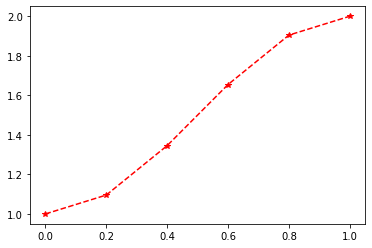

In [145]:
plt.plot(alpha,zfinal,'--r*')

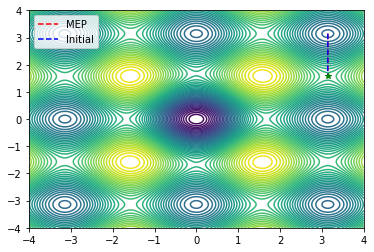

In [153]:
plt.plot(Phi[:,0],Phi[:,1],'--r')
plt.contour(X,Y,Z,50)
plt.plot(I_string[:,0],I_string[:,1],'b--')
plt.legend(['MEP','Initial'])
plt.plot(Phi[maxid,0],Phi[maxid,1],'g*')
# plt.plot(Phi[sec,0],Phi[sec,1],'g*')
# plt.scatter(ac_sd[0],ac_sd[1])

In [149]:
LA.norm(gradient_V(Phi[-1]))

2.433873434755344e-14

In [151]:
LA.norm(gradient_V(I_string[-1]))

0.0062009426721489624

In [155]:
I_string[N],Phi[maxid]

(array([3.14137896, 1.56770923]), array([3.14157887, 1.57080322]))